# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# checking the rows and columns using the shape method
df.shape

(1898, 9)

#### Observations: 

The data has 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

There are one float datatpye for the cost_of_the_order column,four integer datatype columns namely:order_id,customer_id,food_preparation_time and delivery_time and finally four object datatype columns which are strings namely:restaurant_name,cuisine_type,day_of_the_week and rating.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Checking for missing values in the data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

From the above output, it shows that there are no missing values in the data. This is because the sum of the missig values in all the respective columns is zero.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Using the describe function to retrieve the statistical summary of the data and T to transpose the output
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [8]:
# The time it takes for food to be prepared is captured in the column "food_preparation_time"

# Saving the output of the statistical summary of the data
summary_of_df= df.describe().T 

# Filtering the column of interest which is "food_preparation_time"
stats_summary_of_food_preparation_time = summary_of_df.loc['food_preparation_time']
stats_summary_of_food_preparation_time

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:

From the output above, the minimum, average and maximum time it takes for food to be prepared once an order is placed are 20 minutes,27.37 minutes and 35 minutes respectively.


### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
# The value_counts() is used to get the unique counts of each element in the rating column
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:

The output above shows that 736 orders are not rated from the data.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [5 marks]

#### Variable Exploration for "order_id" column

In [10]:
# Using the value_counts() to find the number of unique elements
df['order_id'].value_counts()

1477147    1
1477697    1
1477555    1
1478028    1
1478308    1
          ..
1478087    1
1476775    1
1478421    1
1476774    1
1478056    1
Name: order_id, Length: 1898, dtype: int64

#### Observation: 

The length of the value counts for the order_id column in the data is 1898 which is equivalent the number of rows in the data. Thus, each element in this column is unique.

#### Variable Exploration for "customer_id" column

In [11]:
# Finding the number of unique elements in the customer_id column
df['customer_id'].nunique()

1200

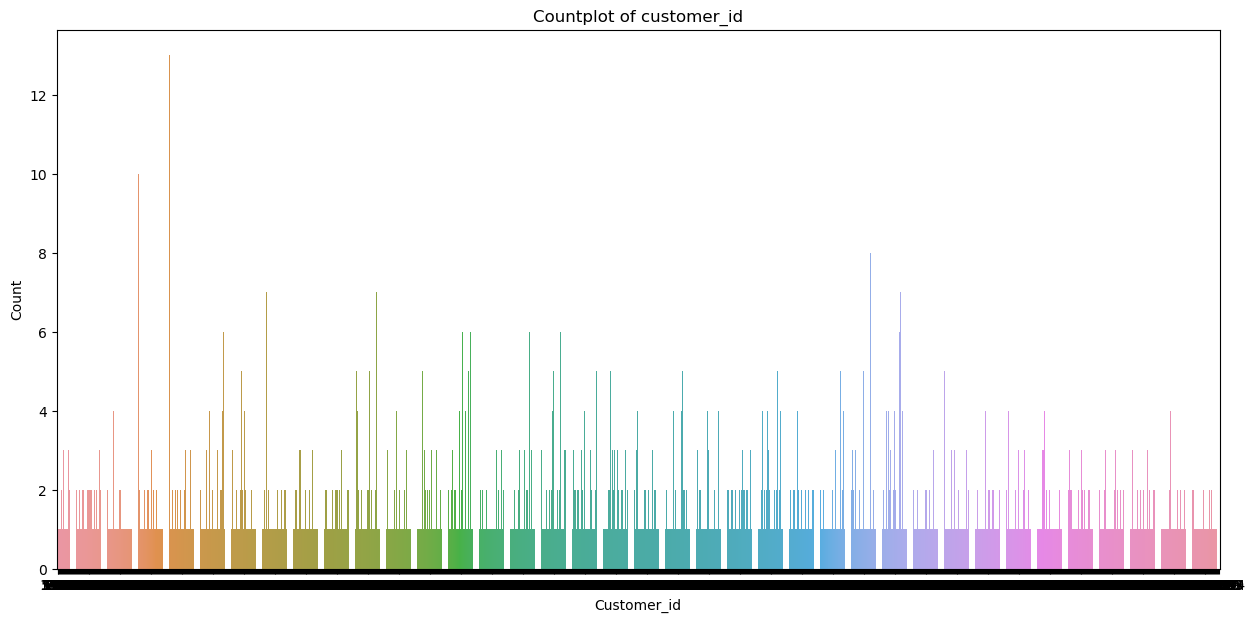

In [12]:
# Visual presentation of the customer_id column using countplot

# Set the figure size
plt.figure(figsize=(15, 7))

sns.countplot(data=df, x='customer_id')

# Set labels and title
plt.xlabel('Customer_id')
plt.ylabel('Count')
plt.title('Countplot of customer_id')

# Show the plot
plt.show()

#### Observation:

There are 1200 unique elements in the customer_id column. This means there are customers who made
multipe orders from the data. This can be seen in the diagram above as some customers have more orders relative to others. 

#### Variable Exploration for "restaurant_name" column

In [13]:
# Using the value_counts() to find the number of unique elements
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

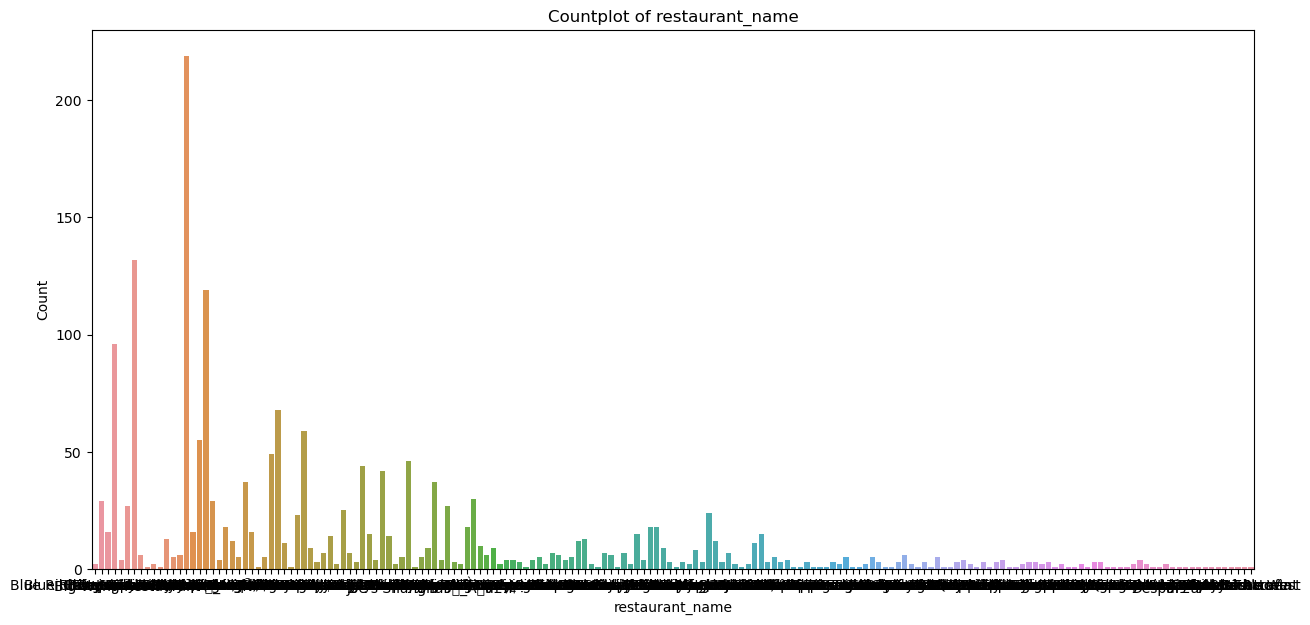

In [14]:
# Visual presentation of the restaurant_name column using countplot

# Set the figure size
plt.figure(figsize=(15, 7))

sns.countplot(data=df, x='restaurant_name')

# Set labels and title
plt.xlabel('restaurant_name')
plt.ylabel('Count')
plt.title('Countplot of restaurant_name')

# Show the plot
plt.show()

#### Observation:

It is evident from the data that Shake Shack has the highest number of orders among all the restaurants, with a total count of 219. This is clearly depicted as the highest bar in the countplot diagram.

#### Variable Exploration for "cuisine_type" column


In [15]:
# Using the value_counts() to find the number of unique elements
df['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

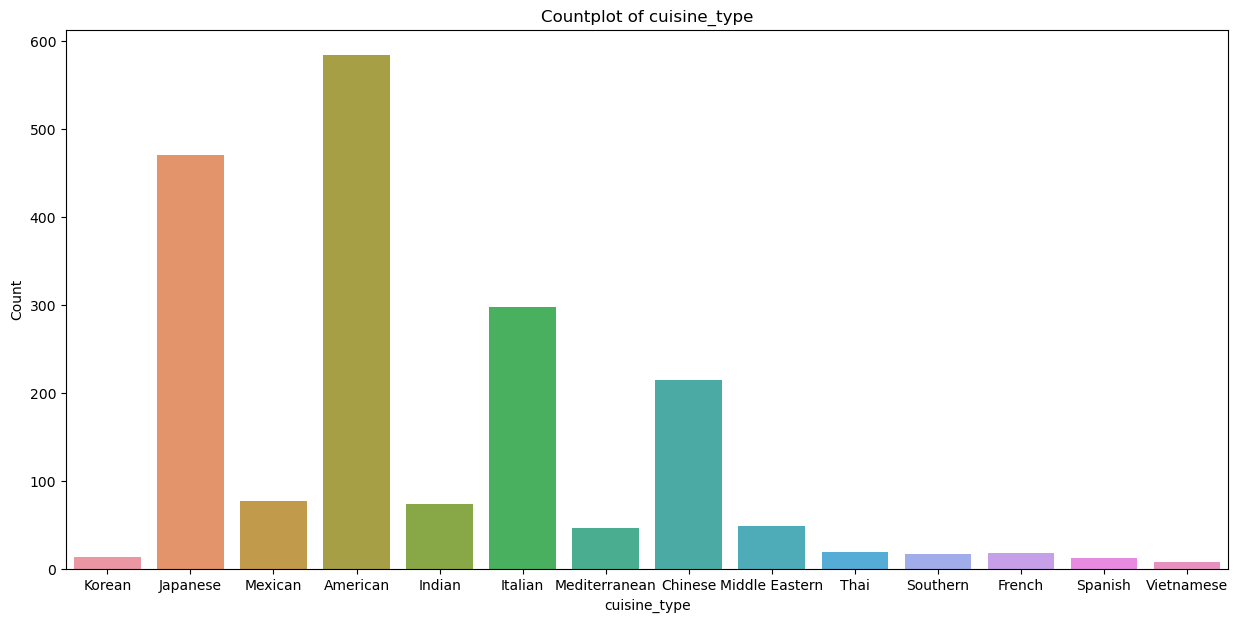

In [16]:
# Visual presentation of the cuisine_type column using countplot

# Set the figure size
plt.figure(figsize=(15, 7))

sns.countplot(data=df, x='cuisine_type')

# Set labels and title
plt.xlabel('cuisine_type')
plt.ylabel('Count')
plt.title('Countplot of cuisine_type')

# Show the plot
plt.show()

#### Observation:

The most frequently ordered cuisine by customers is American with a total of 584 out of 1898 orders from the data. 



#### Variable Exploration for "cost_of_the_order" column

In [17]:
# Using the value_counts() to find the number of unique elements
df['cost_of_the_order'].value_counts()

12.18    86
12.13    82
12.23    47
24.20    42
29.10    37
         ..
5.48      1
17.07     1
6.26      1
9.61      1
29.59     1
Name: cost_of_the_order, Length: 312, dtype: int64

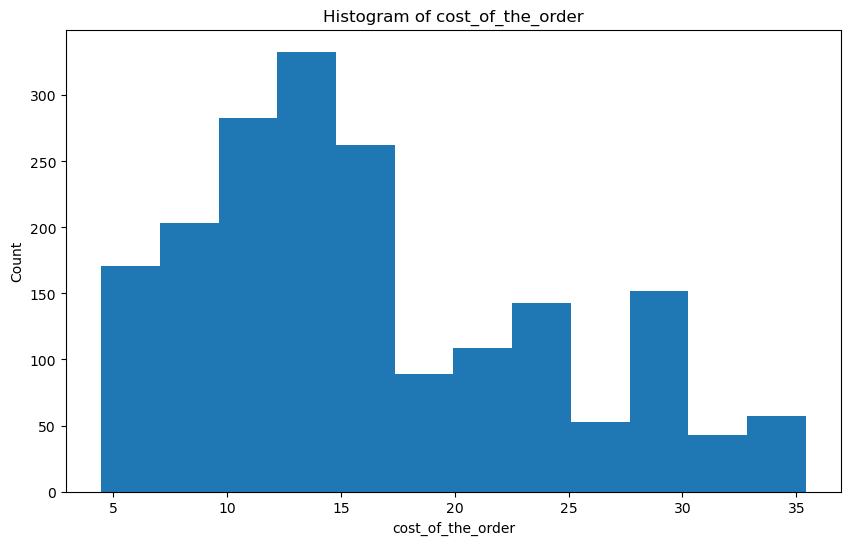

In [18]:
# Visual presentation of the cost_of_the_order column using histogram

# Set the figure size
plt.figure(figsize=(10, 6))

plt.hist(df['cost_of_the_order'],bins=12)

# Set labels and title
plt.xlabel('cost_of_the_order')
plt.ylabel('Count')
plt.title('Histogram of cost_of_the_order')

# Show the plot
plt.show()

#### Observation:

It can depicted from the above that the highest number of orders placed by customers are within the cost_of_the_order range between 12 and 14 dollars.

#### Variable Exploration for "day_of_the_week" column

In [19]:
# Using the value_counts() to find the number of unique elements
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

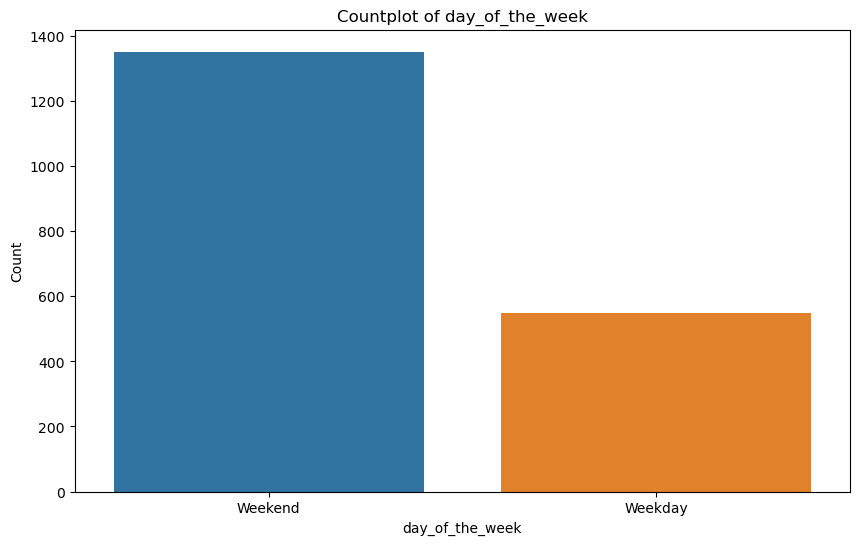

In [20]:
# Visual presentation of day_of_the_week column using countplot

# Set the figure size
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='day_of_the_week')

# Set labels and title
plt.xlabel('day_of_the_week')
plt.ylabel('Count')
plt.title('Countplot of day_of_the_week')

# Show the plot
plt.show()

#### Observation:

It is evident from the above that the number of orders made by customers on weekends is more than double the number of orders made by customers on weekdays.

#### Variable Exploration for "rating" column

In [21]:
# Using the value_counts() to find the number of unique elements
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

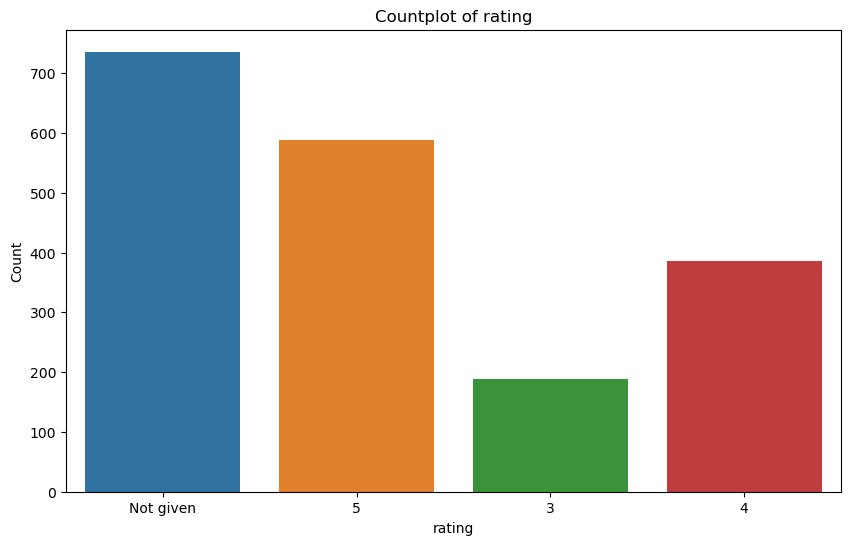

In [22]:
# Visual presentation of rating column using countplot

# Set the figure size
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='rating')

# Set labels and title
plt.xlabel('rating')
plt.ylabel('Count')
plt.title('Countplot of rating')

# Show the plot
plt.show()

#### Observations

The above data shows that out of 1898 orders made by customers, 736 orders were not given any ratings. Additionally, 588 orders received a rating of 5, which is the maximum rating available.


#### Variable Exploration for "food_preparation_time" column

In [23]:
# Using the value_counts() to find the number of unique elements
df['food_preparation_time'].value_counts()

21    135
23    123
27    123
22    123
28    121
24    121
20    119
30    119
33    118
35    117
31    116
26    115
25    113
34    113
32    113
29    109
Name: food_preparation_time, dtype: int64

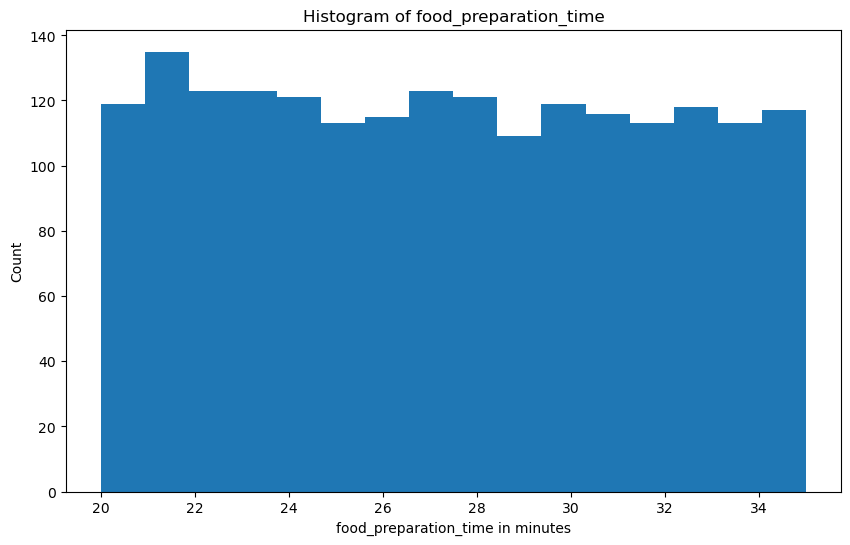

In [24]:
# Visual presentation of the food_preparation_time column using histogram

# Set the figure size
plt.figure(figsize=(10, 6))

plt.hist(df['food_preparation_time'],bins=16)

# Set labels and title
plt.xlabel('food_preparation_time in minutes')
plt.ylabel('Count')
plt.title('Histogram of food_preparation_time')

# Show the plot
plt.show()

#### Observation:

It is observed that most of the orders made by customers took the restaurants 21 minutes to prepare the food from the data.

#### Variable Exploration for "delivery_time" column

In [25]:
# Using the value_counts() to find the number of unique elements
df['delivery_time'].value_counts()

24    162
28    148
29    148
26    141
27    138
30    133
25    120
19     90
16     90
20     88
15     87
22     85
18     83
21     81
17     78
23     77
32     59
33     49
31     41
Name: delivery_time, dtype: int64

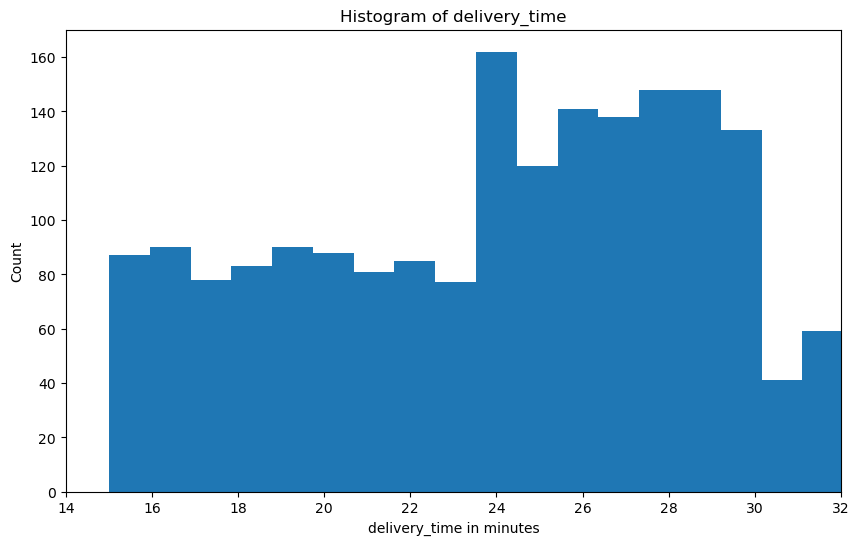

In [26]:
# Visual presentation of delivery_time column using histogram

# Set the figure size
plt.figure(figsize=(10, 6))

plt.hist(df['delivery_time'],bins=19)

# Set labels and title
plt.xlabel('delivery_time in minutes')
plt.ylabel('Count')
plt.title('Histogram of delivery_time')

# Set the x-axis limits
plt.xlim(xmin=14, xmax=32)

# Show the plot
plt.show()

#### Observation:

Based on the data, it is evident that out of 1898 orders, the delivery persons took 24 minutes to deliver the food package for 162 orders. The shortest delivery time recorded in the data was 15 minutes. Furthermore, for a majority of the orders, the delivery time ranged between 23 to 30 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [27]:
# Using the value_counts() to find the number of unique elements
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:

From the above output, the top five restaurants in terms of orders received are as follows:

1. Shake Shack
2. The Meatball Shop 
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [28]:
# Filtering the dataframe to include only weekend data
weekend_data = df[df['day_of_the_week'] == 'Weekend']

# Counting the occurrences of each cuisine_type in the weekend data and selecting the maximum occurence
popular_cuisine = weekend_data['cuisine_type'].value_counts().idxmax()
print(popular_cuisine)

American


#### Observations:

The most popular cuisine on weekends is American from the data.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [1 marks]

In [29]:
# Filtering the dataframe for cost_of_the_order greater than 20 dollars
cost_of_the_order_more_than_20_dollars = df[df['cost_of_the_order'] > 20]

# Getting the dimension of cost_of_the_order_more_than_20_dollars
cost_of_the_order_more_than_20_dollars.shape

# Calculating the percentage of the orders costing more than 20 dollars
percentage_of_the_orders_costing_more_than_20_dollars = (cost_of_the_order_more_than_20_dollars.shape[0]/df.shape[0])*100
print(percentage_of_the_orders_costing_more_than_20_dollars)


29.24130663856691


#### Observations:

From the above output, 29.24% of the total orders costs more than 20 dollars. Thus, 70.76% of the remaining orders from the data costs less than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [30]:
# Finding the mean of the delivery_time column
df['delivery_time'].mean()

24.161749209694417

#### Observations:

The average minutes it takes for a delivery person to deliver a food package to the customer is approximately 24 minutes from the data.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [31]:
# Using the value_counts() to find the number of unique elements in descending order
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

#### Observations:

The top 3 most frequent customers of the company are :

customer_id         number of orders

52832 -             13

47440 -             10

83287 -             9

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [5 marks]


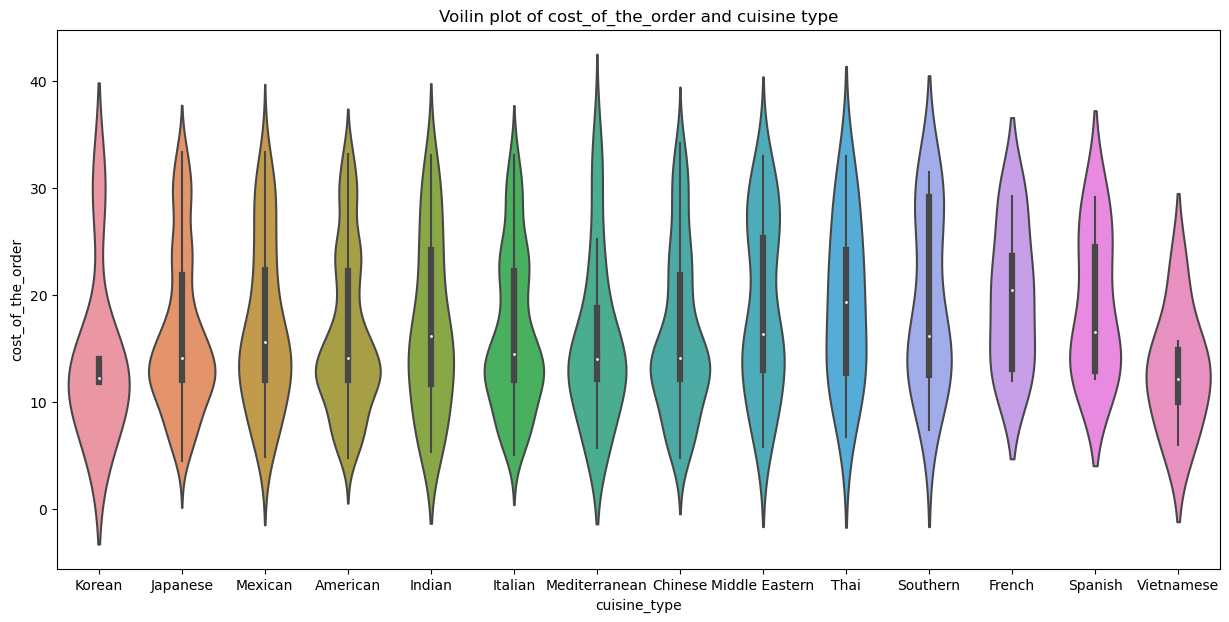

In [32]:
# Relationship between cost_of_the_order and cuisine type using the voilin plot
plt.figure(figsize=(15, 7))
sns.violinplot(y='cost_of_the_order',x='cuisine_type',data=df)
plt.title("Voilin plot of cost_of_the_order and cuisine type")
plt.show()

#### Observation:

The cost of the order range for most of the cuisine types are similar due to the length of the voilin. Also, the mediterranean type of cuisine has the highest cost of order. All the cuisine types have orders which are at least 10 dollars.

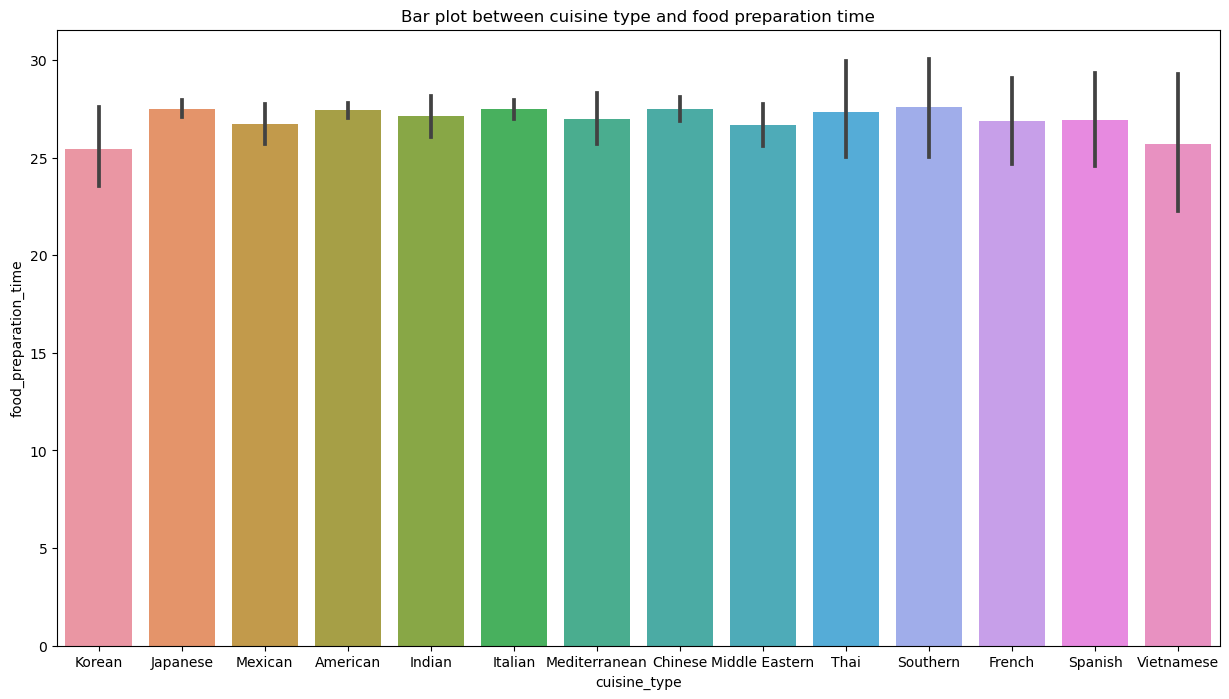

In [33]:
# Relationship between food preparation time and cuisine type using the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x="cuisine_type", y="food_preparation_time", data=df)
plt.title("Bar plot between cuisine type and food preparation time")
plt.show()

#### Observation:

The average time to prepare any kind of cuisine from the data is 25 minutes

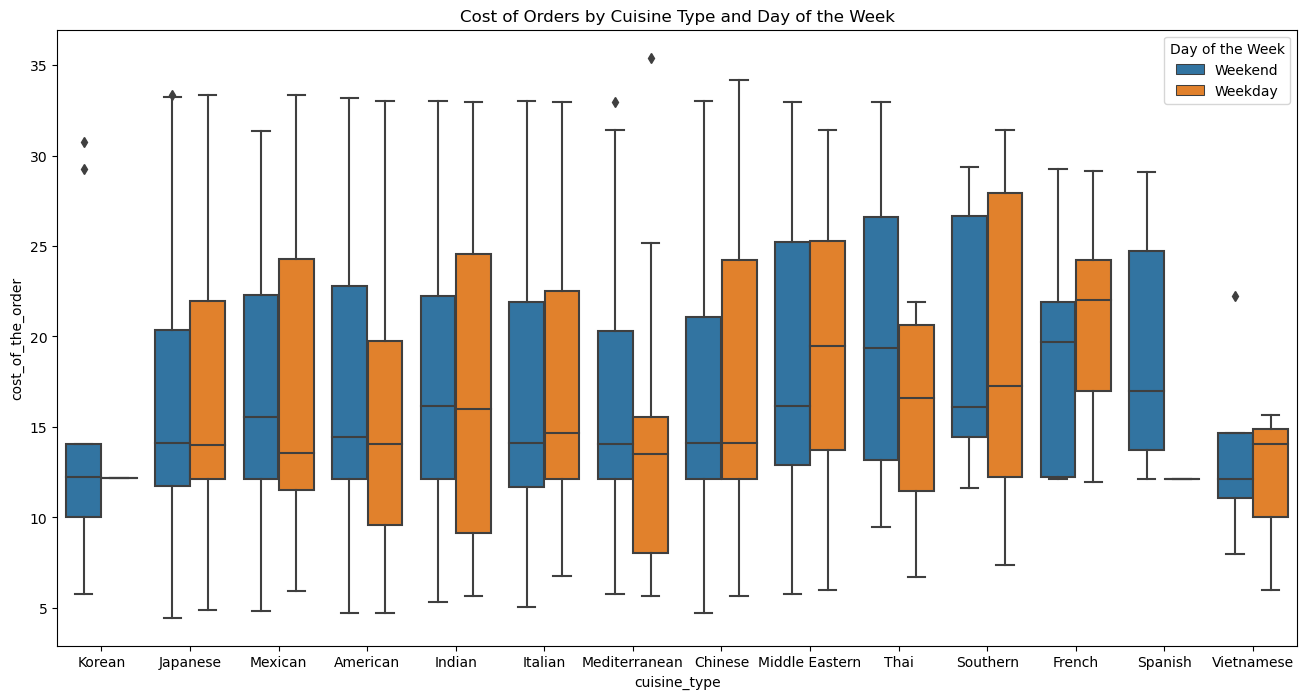

In [34]:
# Comparing the distribution of cost across different cuisine types and day of the week
plt.figure(figsize=(16, 8))
sns.boxplot(x="cuisine_type", y="cost_of_the_order", hue="day_of_the_week", data=df)
plt.title("Cost of Orders by Cuisine Type and Day of the Week")
plt.legend(title="Day of the Week")
plt.show()

#### Observation:

It is evident from the above that no orders of Korean and Spanish cuisine were made by the customers during the weekday. Also, majority of the orders cost between 5 to 33 dollars and there was at least an order of every type of cuisine during the weekends.



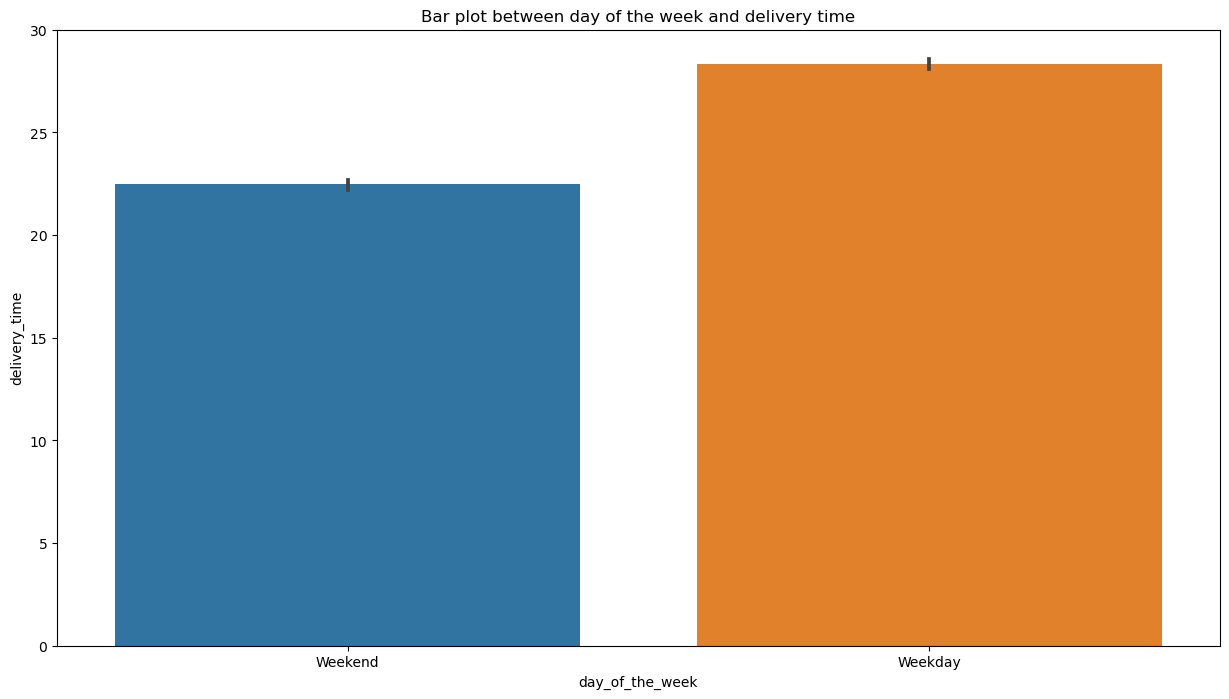

In [35]:
# Relationship between day_of_the_week and delivery time using the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x="day_of_the_week", y="delivery_time", data=df)
plt.title("Bar plot between day of the week and delivery time")
plt.show()

#### Observation:

It took delivery persons less than or equal to 23 minutes to deliver food packages to the customers on a weekend whiles more than 27 minutes to deliver food packages to customers on a weekday.

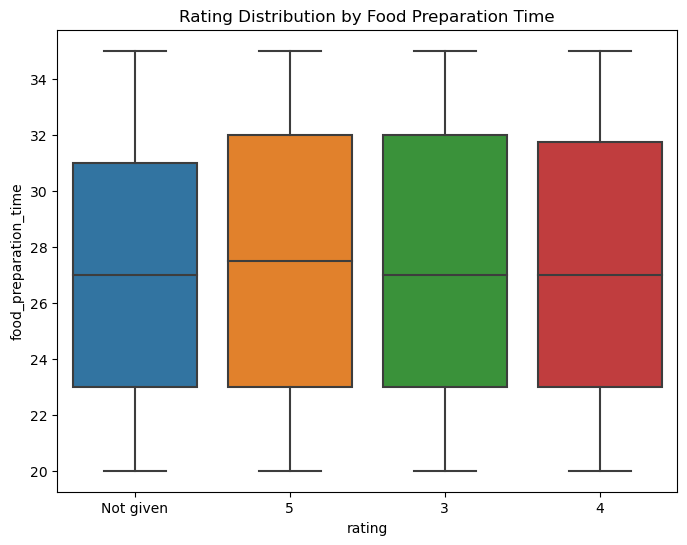

In [36]:
# Comparing the distribution of ratings across different food preparation times
plt.figure(figsize=(8, 6))
sns.boxplot(x="rating", y="food_preparation_time", data=df)
plt.title("Rating Distribution by Food Preparation Time")
plt.show()

#### Observation:

There is no much difference between the food preparation time across the different ratings. However, accross all the ratings, 75% of the orders prepared within a shorter time in minutes were not given ratings.

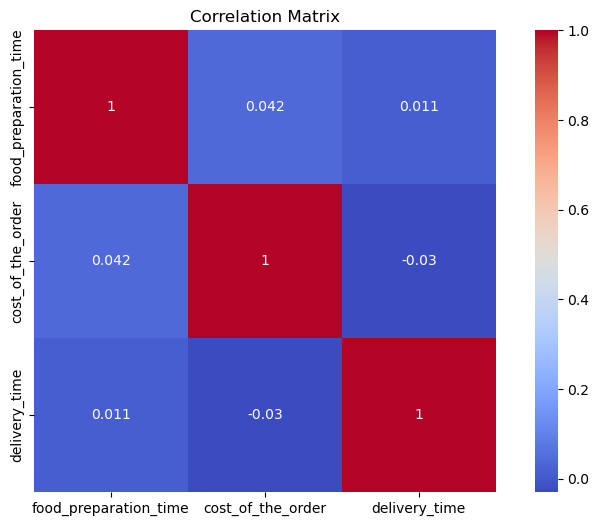

In [37]:
# Correlation Analysis

# Calculating the correlation matrix among the numerical variables in the data
corr_matrix = df[['food_preparation_time', 'cost_of_the_order', 'delivery_time']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()


#### Observation:

The correlation coefficients indicated above across the variables: delivery time, cost of the order and food preparation time that is a very week correlation or relationship among the variables.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [1.5 marks]

In [38]:
# Filter the dataframe for ratings count > 50
filtered_df = df.groupby('restaurant_name').filter(lambda x: len(x) > 50)

# Convert the 'rating' column to numeric, ignoring non-numeric values
filtered_df['rating'] = pd.to_numeric(filtered_df['rating'], errors='coerce')

# Filter out non-numeric ratings by dropping them
filtered_df = filtered_df.dropna(subset=['rating'])

# Calculate the average rating for each restaurant
average_rating = filtered_df.groupby('restaurant_name')['rating'].mean()

# Filter the restaurants with average rating > 4
selected_restaurants = average_rating[average_rating > 4]

# Get the rating count and average rating for the selected restaurants
rating_count = filtered_df['restaurant_name'].value_counts()[selected_restaurants.index]
average_rating = selected_restaurants.values

# Print the rating count and average rating for the selected restaurants
for restaurant, count, rating in zip(selected_restaurants.index, rating_count, average_rating):
    print(f"Restaurant: {restaurant}   Rating Count: {count}   Average Rating: {rating}")


Restaurant: Blue Ribbon Fried Chicken   Rating Count: 64   Average Rating: 4.328125
Restaurant: Blue Ribbon Sushi   Rating Count: 73   Average Rating: 4.219178082191781
Restaurant: Parm   Rating Count: 39   Average Rating: 4.128205128205129
Restaurant: RedFarm Broadway   Rating Count: 41   Average Rating: 4.2439024390243905
Restaurant: RedFarm Hudson   Rating Count: 34   Average Rating: 4.176470588235294
Restaurant: Shake Shack   Rating Count: 133   Average Rating: 4.2781954887218046
Restaurant: The Meatball Shop   Rating Count: 84   Average Rating: 4.511904761904762


#### Observations:

The restaurants fulfilling the criteria to get the promotional offer are as follows:

* Blue Ribbon Fried Chicken
* Blue Ribbon Sushi
* Parm  
* RedFarm Broadway
* RedFarm Hudson
* Shake Shack
* The Meatball Shop 



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [1.5 marks]

In [39]:
# Calculate the revenue for orders greater than $20 with a 25% charge
orders_above_20 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * 0.25

# Calculate the revenue for orders greater than $5 with a 15% charge
orders_above_5 = df[df['cost_of_the_order'] > 5]['cost_of_the_order'].sum() * 0.15

# Calculate the net revenue by summing the two revenue amounts
net_revenue = orders_above_20 + orders_above_5

print("Net Revenue: $", net_revenue)


Net Revenue: $ 8379.539499999999


#### Observations:

The net revenue generated by the company across all orders is $8,379.54.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [1 marks]

In [40]:
# Calculate the total time required for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders that take more than 60 minutes
percentage_above_60 = (df[df['total_time'] > 60].shape[0] / df.shape[0]) * 100

print("Percentage of orders taking more than 60 minutes: {:.2f}%".format(percentage_above_60))


Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:

10.54% of the orders take more than 60 minutes to get delivered to the customers from the time the order is placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [1 marks]

In [41]:
# Group the data by day_of_the_week and calculate the mean delivery time for each group
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

# Extract the mean delivery time for weekdays and weekends
mean_weekday_delivery_time = mean_delivery_time['Weekday']
mean_weekend_delivery_time = mean_delivery_time['Weekend']

# Print the results
print("Mean delivery time on weekdays: {:.2f} minutes".format(mean_weekday_delivery_time))
print("Mean delivery time on weekends: {:.2f} minutes".format(mean_weekend_delivery_time))

Mean delivery time on weekdays: 28.34 minutes
Mean delivery time on weekends: 22.47 minutes


#### Observations:

The mean delivery time during weekends is less compared to the mean delivery time during the weekdays.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [5 marks]

### Conclusions:

*  The most popular restaurant based on the number of demand is Shake Shack as well as other restaurants with significant number of orders. But, there are some restaurants that recorded only one order from the data. The four most preferred cuisine by customers are American, Japanese, Italian and Chinese. Majority of the orders made were between 12 to 14 dollars. In addition, most of the orders made by customers were during the weekends. 736 out of 1898 orders were not given rating which is approximately 39% of the total orders. Also, the average delivery time during the weekends are less compared to the weekdays despite the greater number of orders during the weekends. 89.46% of the orders take less than 60 minutes to get delivered to the customers from the time the order is placed.

### Recommendations:

*  Analyzing the cuisine types can provide insights into customer preferences. It would be beneficial to make the most popular cuisine available at all times. This can be used to optimize the menu and focus on offering a wider variety of the most popular cuisines.

* The feedback ratings can help understand customer satisfaction levels. Identifying the factors contributing to high ratings can guide the company in maintaining and enhancing those aspects. It is worth noting that 736 orders were not given ratings by the customers. This is quite a significant number. It might be that the customers were not satisfied or it could be something else. Hence, I will recommend the company add comment sections in addition to the rating to properly get the full picture with regards of the satisfaction of their customers.

*  Encouraging customer feedback and engagement can provide valuable insights for the company. Implementing customer feedback mechanisms such as online reviews, surveys, or loyalty programs can help gather feedback, understand customer preferences, and build strong customer relationships.

* The provision of discounts to customers who frequently make orders can lead to an increase in demand. This can can act as a sales stimulus by encouraging customers to purchase more or make larger purchases. Customers may choose to purchase from a company offering a discount rather than from competitors who do not have similar promotions. This can result in an increase in demand as customers are incentivized to choose the discounted product over alternatives.

---